## SEMANA III: Entrenamiento de Redes Neuronales con TensorFlow

1. Realizar el entrenamiento de una Red Neuronal para predecir la Formula del cambio
de Temperatura de Grados a Farenheit a Celcius (Centigrados).


Importamos librerías necesarias

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [23]:
rng = np.random.default_rng(0)
F = rng.uniform(-40, 212, size=(5000, 1)).astype(np.float32)  # Fahrenheit (rango amplio)
C = ((F - 32) * 5/9).astype(np.float32)

print("Primeros 5 registros:")
for i in range(5):
    print(f"{F[i,0]:7.2f} °F  ->  {C[i,0]:7.2f} °C")

Primeros 5 registros:
 120.51 °F  ->    49.17 °C
  27.99 °F  ->    -2.23 °C
 -29.67 °F  ->   -34.26 °C
 -35.84 °F  ->   -37.69 °C
 164.94 °F  ->    73.86 °C


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # 1 entrada (°F), 1 salida (°C)
])

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
history = model.fit(F, C, epochs=20, verbose=1)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2588.3467
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1325.4633
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 641.3880
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 315.1434
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 183.5934
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139.2627
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126.7282
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 123.3871
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 122.0944
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 121.1407
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 120.1643
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 119.1324
Epoch 13/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 118.0273
Epoch 14/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 116.8525
Epoch 15/20
157

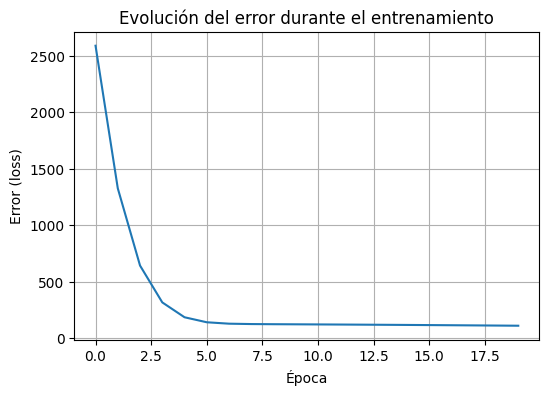

In [27]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Error (loss)")
plt.title("Evolución del error durante el entrenamiento")
plt.grid(True)
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


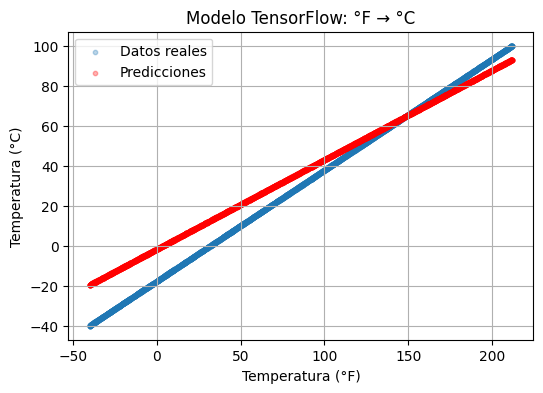

In [28]:
C_pred = model.predict(F)

plt.figure(figsize=(6,4))
plt.scatter(F, C, alpha=0.3, s=10, label="Datos reales")
plt.scatter(F, C_pred, color="red", alpha=0.3, s=10, label="Predicciones")
plt.xlabel("Temperatura (°F)")
plt.ylabel("Temperatura (°C)")
plt.title("Modelo TensorFlow: °F → °C")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
nuevo_valor = np.array([[212]], dtype=np.float32)  # 212 °F (punto de ebullición del agua)
prediccion = model.predict(nuevo_valor)
print(f"El modelo predice que 212 °F ≈ {prediccion[0,0]:.2f} °C")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
El modelo predice que 212 °F ≈ 93.06 °C
